In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


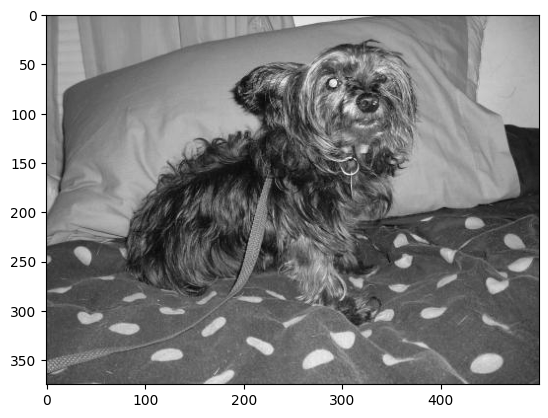

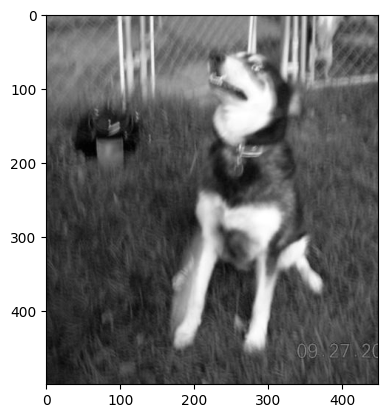

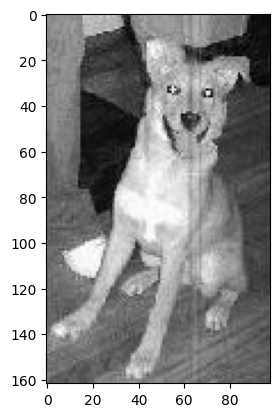

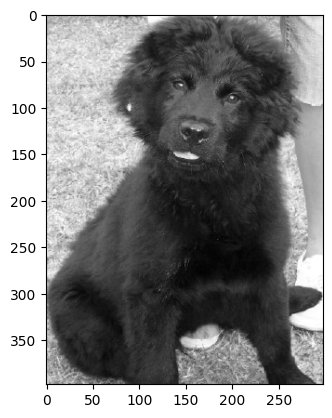

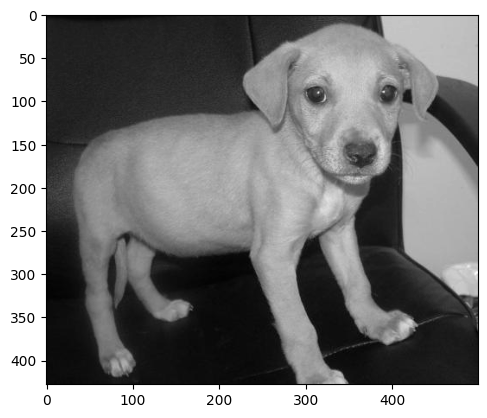

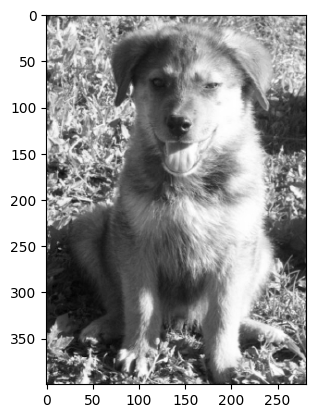

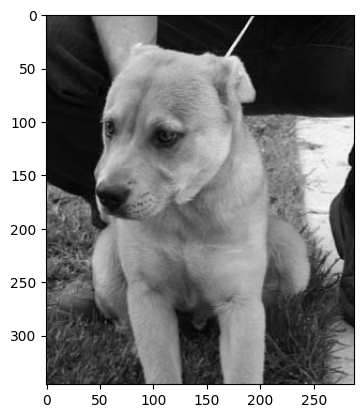

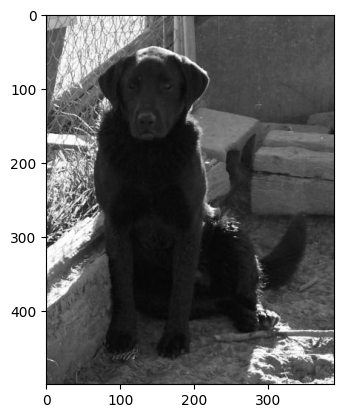

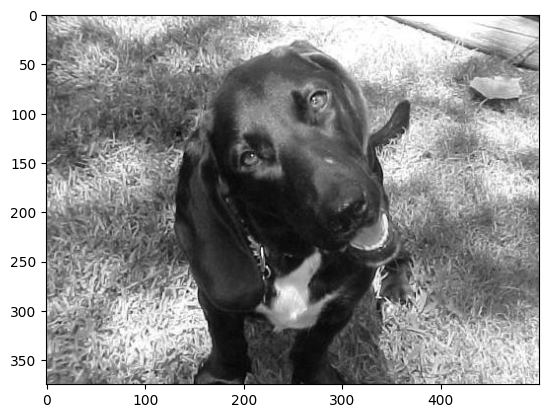

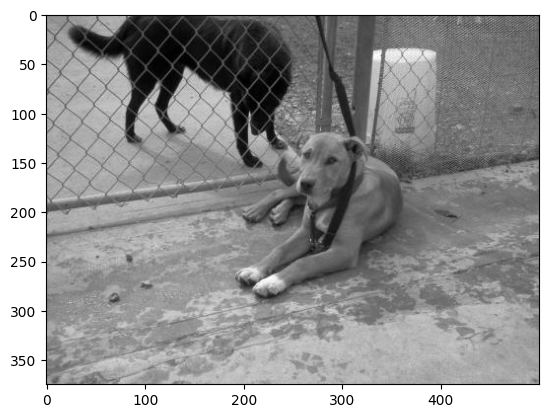

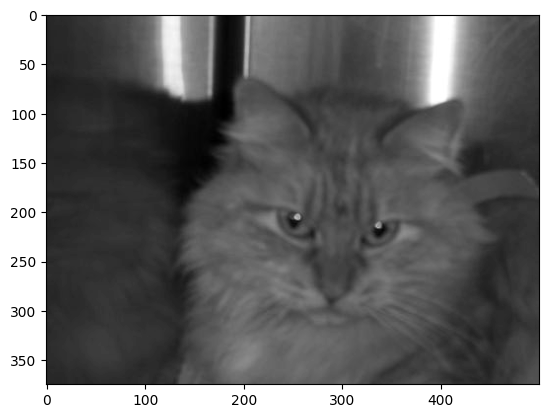

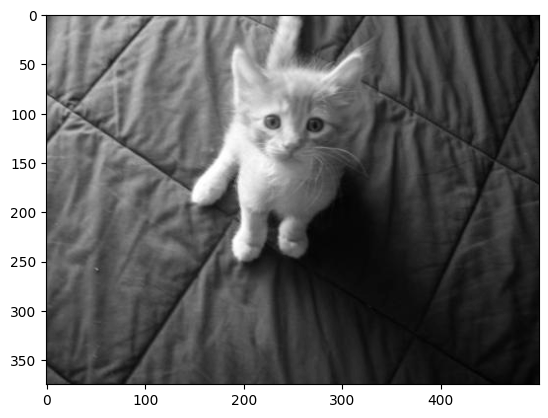

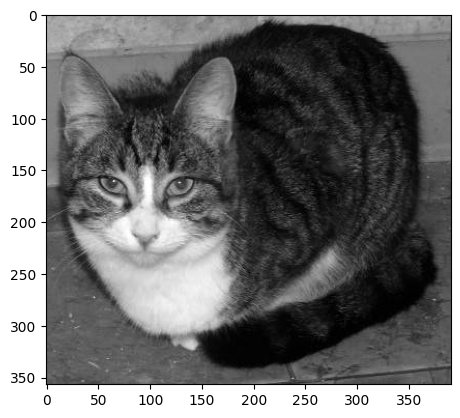

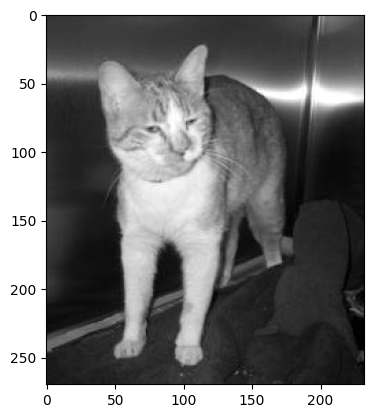

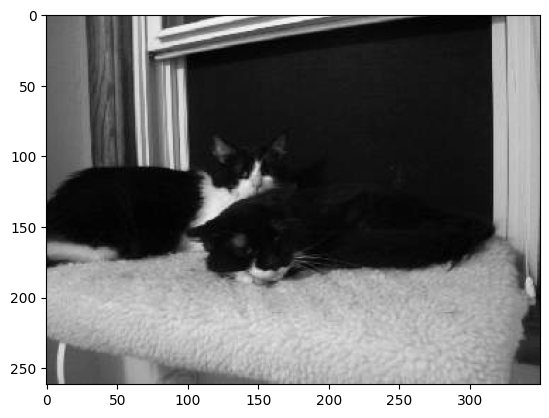

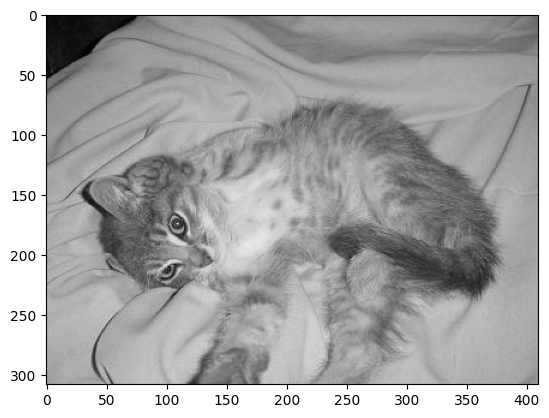

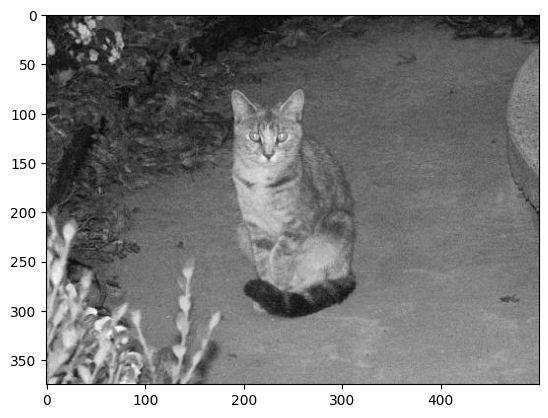

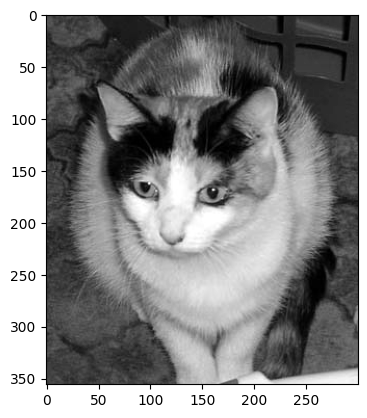

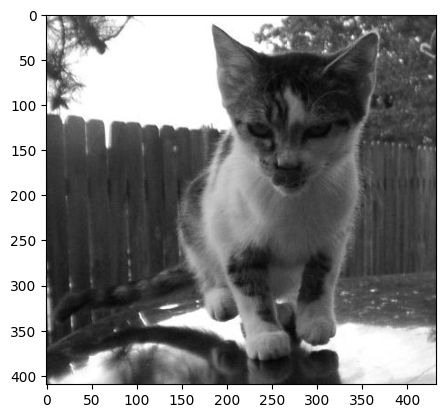

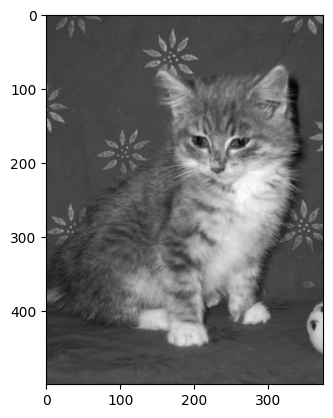

In [100]:
DATADIR = '/content/drive/MyDrive/PetImages'
CATEGORIES = ["dog", "cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print('')
        if x==10 : 
            break        

[[70 70 70 ... 74 68 68]
 [70 70 69 ... 69 70 72]
 [70 69 69 ... 84 81 77]
 ...
 [75 75 76 ... 82 81 81]
 [77 77 77 ... 81 81 80]
 [79 79 78 ... 81 81 80]]
(500, 375)


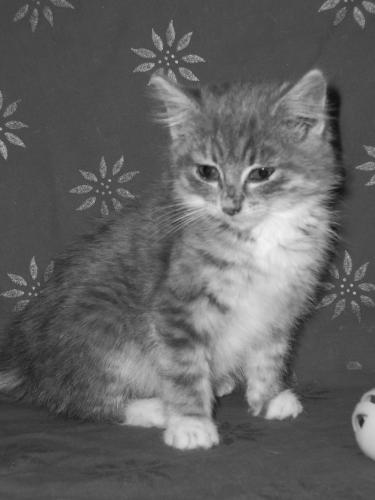

In [101]:
print(img_array)
print(img_array.shape)
cv2_imshow(img_array)

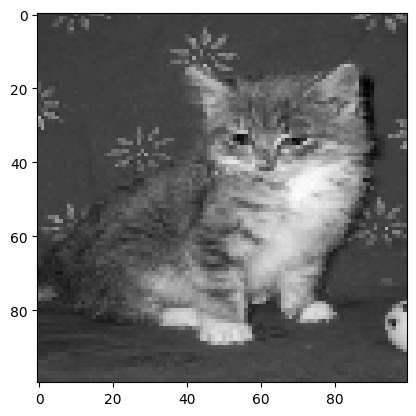

In [102]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [103]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()


100%|██████████| 500/500 [00:01<00:00, 262.32it/s]


In [104]:
print(len(training_data))
print(training_data[0])
print(training_data[:5])
print(training_data[500:505])

999
[array([[119, 108, 140, ..., 141, 138, 136],
       [124, 112, 138, ..., 147, 144, 139],
       [125, 117, 143, ..., 153, 149, 144],
       ...,
       [ 67,  96,  83, ...,  70,  67,  67],
       [ 77,  77,  82, ...,  70,  71,  69],
       [ 70,  78,  78, ...,  71,  88,  75]], dtype=uint8), 0]
[[array([[119, 108, 140, ..., 141, 138, 136],
       [124, 112, 138, ..., 147, 144, 139],
       [125, 117, 143, ..., 153, 149, 144],
       ...,
       [ 67,  96,  83, ...,  70,  67,  67],
       [ 77,  77,  82, ...,  70,  71,  69],
       [ 70,  78,  78, ...,  71,  88,  75]], dtype=uint8), 0], [array([[118, 125, 124, ..., 161, 141,  98],
       [123, 131, 117, ..., 142, 138, 121],
       [115,  90,  93, ..., 113, 124, 118],
       ...,
       [ 30,  30,  32, ...,  71,  61,  53],
       [ 25,  32,  37, ...,  65,  65,  64],
       [ 30,  36,  35, ...,  59,  48,  59]], dtype=uint8), 0], [array([[132, 134, 126, ...,  16,  14,  14],
       [146, 145, 133, ...,  12,  12,  12],
       [143, 141, 1

In [105]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
0
1
1
1
1


In [106]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE)
Y = np.array(Y)

In [107]:
X[:2]


array([[[155, 152, 153, ..., 176, 173, 170],
        [150, 124, 126, ..., 175, 173, 174],
        [151, 146, 153, ..., 175, 174, 173],
        ...,
        [191, 204, 194, ..., 228, 220, 214],
        [198, 197, 199, ..., 220, 217, 219],
        [201, 198, 198, ..., 222, 226, 222]],

       [[ 85,  89,  80, ..., 102,  94,  87],
        [ 88,  83,  89, ...,  93,  99, 101],
        [ 92,  93,  78, ..., 101, 101,  96],
        ...,
        [ 44,  23,  31, ...,  65,  84,  61],
        [ 55,  36,  30, ...,  81,  58,  40],
        [ 48,  36,  36, ...,  58,  52,  39]]], dtype=uint8)

In [108]:
Y[:2]

array([1, 1])

In [109]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(799, 100, 100)
(200, 100, 100)
(799,)
(200,)


In [138]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [139]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [140]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 4s 120ms/step - loss: 136.6261 - accuracy: 0.4919
Epoch 2/10
25/25 [==============================] - 3s 105ms/step - loss: 50.7238 - accuracy: 0.4844
Epoch 3/10
25/25 [==============================] - 2s 76ms/step - loss: 13.6214 - accuracy: 0.5019
Epoch 4/10
25/25 [==============================] - 2s 79ms/step - loss: 5.8392 - accuracy: 0.5119
Epoch 5/10
25/25 [==============================] - 2s 82ms/step - loss: 2.8418 - accuracy: 0.5131
Epoch 6/10
25/25 [==============================] - 2s 79ms/step - loss: 1.8173 - accuracy: 0.4856
Epoch 7/10
25/25 [==============================] - 2s 93ms/step - loss: 1.1539 - accuracy: 0.5207
Epoch 8/10
25/25 [==============================] - 3s 117ms/step - loss: 0.9742 - accuracy: 0.4969
Epoch 9/10
25/25 [==============================] - 2s 87ms/step - loss: 0.7456 - accuracy: 0.5332
Epoch 10/10
25/25 [==============================] - 2s 79ms/step - loss: 0.8727 - accuracy: 0.5394


In [141]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
test_acc

7/7 [==============================] - 0s 13ms/step - loss: 0.6995 - accuracy: 0.5650


0.5649999976158142

In [142]:
output = model.predict(X_test)
Y_pred=np.argmax(output,axis=1)

7/7 [==============================] - 0s 12ms/step


In [143]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58       107
           1       0.53      0.58      0.55        93

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.56      0.57       200



In [144]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[59 39]
 [48 54]]
